## Results-proccessing file for the abyssal hill shape analysis ###
This file reads the **"*_hill_shape.track1.txt"** file, which cotains the results of shape analyis made by the **maxima_to_morph.pl** script. The file plots the results for hills (and their inward & outward flanks) along the track. It also computes the following:
    1. Standard errors (SE) for the shape parameters (slope, height, width, area), for each hill and its flanks. 
    2. Averages for the entire track (for the hills and their two (inward & outward) flanks separately) .
    3. Inward-facing percentages for the slope parameter.
    
**You need to run each of the cells below, following their order. **
    
The file writes two output files:
    1. A csv file that conatains the track-averages and inward-facing percentages.
    2. A txt file that conatains the shape parametres (together with SE) of the hills along the track.
    
### Important notes - READ BEFORE USING THIS FILE!
1) This file is designed for tracks that do not cross the MOR axis.

2) The shape analysis of the cross-sections is done with ** _right_ and _left_ directions, not geographical directions**. It's important to realize which of these directions are inward (facing the axis) and outward (facing opposite from the axis). This can be realized by running **plotter_srt.pl** with lines **47-55** enabled. These lines will plot the directions from which the cross-sections begin (shows a **negative** distance, which means **left**) and end (shows a **positive** distance, which means **right**).

3) Following the previous comment, set which of the sides (**left or right**) is the inward facing side, and which is the outward facing side. This is done with the **in_side** variable in cell #7 below.

4) The file is originly designed for tracks that run from **East to West**. If your track runs roughly North-South, check whether it also runs from East to West. **If it isn't** (i.e., runs from **West to East**), it's ok. Just enable the last line in cell #5 (""# avg_fl=np.flipud(avg_fl) # for reversing the array - if the hills are aranged from W to E"").

5) This file requires the following modules to be installed on your computer:
    1. numpy
    2. matplotlib
    3. bokeh



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
# from mpl_toolkits.axes_grid1 import host_subplot
# import mpl_toolkits.axisartist as AA
import bokeh.plotting as bk
import bokeh.charts as ch

bk.output_notebook()

/Users/roigranot/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1066: UserWarning: Duplicate key in file "/Users/roigranot/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


Loading BokehJS ...

In [2]:
def lonlatdist(p1,p2):
    '''Haversine fomula.
    Input: 2 arrays/lists. each one is [lon lat]
    Output: float [km]'''
    R=6371.
    p1=np.deg2rad(p1)
    p2=np.deg2rad(p2)
    a=(np.sin((p1[1]-p2[1])/2))**2+np.cos(p1[1])*np.cos(p2[1])*(np.sin((p1[0]-p2[0])/2))**2
    c=2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d=R*c
    return d

def autolabel(ax,rects):
    '''attach some text labels'''
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),size=12 ,ha='center', va='bottom')

In [3]:
### Name of the results-file
f_name="MAR_28N_-43.9_to_-43.6_hill_shape.track1.txt"

In [4]:
### Reading from file:
avg=[]
stk=[]
std=[]
distl=[]
in_put=open(f_name,"r")
in_put.next()
n_profiles=0 # counter - number of profiles 
for line in in_put:
    l_list=line.split()
    if "avg" in l_list[0]:
        if len(l_list)==15:
            l_list=l_list[2:]
            l_list.append(line.split()[1])
        elif len(l_list)==14:
            l_list=l_list[1:]
            num_hill_str=line.split()[0]
            l_list.append(num_hill_str[num_hill_str.find("_")+1:])
        l_list.append(n_profiles)
        l_list=np.asarray(l_list,dtype=float)
        avg.append(l_list)
    elif "std" in l_list[0]:
        if len(l_list)==15:
            l_list=l_list[2:]
            l_list.append(line.split()[1])
        elif len(l_list)==14:
            l_list=l_list[1:]
            num_hill_str=line.split()[0]
            l_list.append(num_hill_str[num_hill_str.find("_")+1:])
        l_list.append(n_profiles)
        l_list=np.asarray(l_list,dtype=float)
        std.append(l_list)
        n_profiles=0
    elif l_list[4]!="0":
        n_profiles+=1
in_put.close()

avg.sort
std.sort
avg=np.asarray(avg)
std=np.asarray(std)

In [5]:
### Cell #5

### removing the "bad" hills:
avg_fl=[np.hstack((0.,avg[0]))]
std_fl=[np.hstack((0.,std[0]))]
dist_t=0.
for i in range(1,len(avg)):
    dist=lonlatdist(avg[i,0:2],avg[i-1,0:2])
    if dist>0.5:
        dist_t+=dist
        avg_temp=np.hstack((dist_t,avg[i]))
        avg_fl.append(avg_temp)
        std_temp=np.hstack((dist_t,std[i]))
        std_fl.append(std_temp)

avg_fl=np.asarray(avg_fl)
avg_fl=avg_fl[avg_fl[:,4]!=0]
std_fl=np.asarray(std_fl)
std_fl=std_fl[std_fl[:,4]!=0]

print avg_fl[:,(14,15)] # 14 - hill num; 15 - number of succseful cross-sections

# avg_fl=np.flipud(avg_fl) # for reversing the array - if the hills are aranged from W to E

[[  2.  25.]
 [  3.  51.]
 [  4.  50.]]


In [6]:
#### Array legend ####
# avg_fl[:,4] = left width
# avg_fl[:,5] = right width
# avg_fl[:,6] = left height
# avg_fl[:,7] = right height
# avg_fl[:,8] = left minmax slope
# avg_fl[:,9] = right minmax slope
# avg_fl[:,10] = left max slope
# avg_fl[:,11] = right max slope
# avg_fl[:,12] = left area
# avg_fl[:,13] = right area
# avg_fl[:,14] = hill num
# avg_fl[:,15] = number of cross-sections

#### Set which side (left or right) is inward

In [7]:
### cell #7

in_side=0  # determies the side of the track from the MOR. 
           # 0 - even columns (left side of the hills) are inward;
           # 1 - odd columns (right side of the hills) are inward
    
if in_side==0:
    minmax_col_i=8
    minmax_col_o=9
    hgt_col_i=6
    hgt_col_o=7
    wdt_col_i=4
    wdt_col_o=5
    area_col_i=12
    area_col_o=13
elif in_side==1:
    minmax_col_i=9
    minmax_col_o=8
    hgt_col_i=7
    hgt_col_o=6
    wdt_col_i=5
    wdt_col_o=4
    area_col_i=13
    area_col_o=12

#### Decide which x-axis to plot:

In [8]:
### Cell #7
x_col=1 # x-axis for plotting: 0 - distance along track; 1 - longtitude; 2 - latitude
x=avg_fl[:,x_col] 
if x_col==0:
    x_ax_lbl="Distance along track"
elif x_col==1:
    x_ax_lbl="Longitude"
else:
    x_ax_lbl="Latitude"
print "number of hills = ",len(x)
print "median of cross sections for a hill = ",np.median(avg_fl[:,15]),"\n"

number of hills =  3
median of cross sections for a hill =  50.0 



### Creating arrays for writing the track results to a csv file

In [9]:
out_ar_slp=np.zeros(13) # slope data array to write to csv
out_ar_area=np.zeros(13) # area data array to write to csv
out_ar_wdt=np.zeros(13) # width data array to write to csv
out_ar_hgt=np.zeros(13) # height data array to write to csv
out_ar_slp[0]=out_ar_area[0]=out_ar_wdt[0]=out_ar_hgt[0]=len(x)
out_ar_slp[1]=out_ar_area[1]=out_ar_wdt[1]=out_ar_hgt[1]=np.median(avg_fl[:,15])

##  Slope analysis

In [10]:
minmax_i=avg_fl[:,minmax_col_i]
minmax_o=avg_fl[:,minmax_col_o]
minmax_t=(minmax_i+minmax_o)/2.

err_minmax_i=std_fl[:,minmax_col_i]/(std_fl[:,15]**0.5)
err_minmax_o=std_fl[:,minmax_col_o]/(std_fl[:,15]**0.5)
minmax_t_err=(std_fl[:,8]+std_fl[:,9])/(std_fl[:,15]**0.5)

TOOLS="hover,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset,save"

### Hills plot
p = bk.figure(plot_width=900,plot_height=400,tools=TOOLS)
p.title.text = "Slope of hills"
p.title.align = "center"
p.title.text_font_size = "15px"
p.xaxis.axis_label = x_ax_lbl
p.yaxis.axis_label = 'Slope [deg]'
l_alpha=1
hill_color="Grey"
hill_l_color="Black"
p.segment(x, minmax_t-minmax_t_err, x, minmax_t+minmax_t_err,line_color=hill_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, minmax_t+minmax_t_err, 0.01, 0.01,line_color=hill_l_color,line_alpha=l_alpha)
p.rect(x, minmax_t-minmax_t_err, 0.01, 0.01,line_color=hill_l_color,line_alpha=l_alpha)
p.scatter(x,minmax_t, size=7,marker="square",fill_color=hill_color,line_color=hill_l_color)
bk.show(p)

### Flanks plot
p = bk.figure(plot_width=900,plot_height=400,tools=TOOLS)
p.title.text = "Slope of flanks"
p.title.align = "center"
p.title.text_font_size = "15px"
p.xaxis.axis_label = x_ax_lbl
p.yaxis.axis_label = 'Slope [deg]'

in_color="CornflowerBlue"
in_l_color="Navy"
p.segment(x, minmax_i-err_minmax_i, x, minmax_i+err_minmax_i,line_color=in_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, minmax_i+err_minmax_i, 0.01, 0.01,line_color=in_l_color,line_alpha=l_alpha)
p.rect(x, minmax_i-err_minmax_i, 0.01, 0.01,line_color=in_l_color,line_alpha=l_alpha)
p.scatter(x,minmax_i, size=7,marker="square",fill_color=in_color,line_color=in_l_color,legend="Inward")

out_color="LightCoral"
out_l_color="DarkRed"
p.segment(x, minmax_o-err_minmax_o, x, minmax_o+err_minmax_o,line_color=out_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, minmax_o+err_minmax_o, 0.01, 0.01,line_color=out_l_color,line_alpha=l_alpha)
p.rect(x, minmax_o-err_minmax_o, 0.01, 0.01,line_color=out_l_color,line_alpha=l_alpha)
p.scatter(x,minmax_o, size=7,marker="square",fill_color=out_color,line_color=out_l_color,legend="Outward")

bk.show(p)

### Averages for track

In [11]:
slp_avg=np.average(np.hstack((minmax_i,minmax_o)))
slp_avg_stder=(sum((std_fl[:,15]-1)*(std_fl[:,8]+std_fl[:,9])**2)
               /(sum(std_fl[:,15])-len(std_fl)))**0.5/2/(len(x)**0.5)
slp_i=np.average(minmax_i)
slp_i_err=(sum((std_fl[:,15]-1)*std_fl[:,minmax_col_i]**2)
           /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)
slp_o=np.average(minmax_o)
slp_o_err=(sum((std_fl[:,15]-1)*std_fl[:,minmax_col_o]**2)
           /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)

print "average Total slope = {:.1f}".format(slp_avg)
print "average Total slope stder = {:.1f}".format(slp_avg_stder)
print "average IN slope = {:.1f}".format(slp_i)
print "average IN slope stder = {:.1f}".format(slp_i_err)
print "average OUT slope = {:.1f}".format(slp_o)
print "average OUT slope stder = {:.1f}".format(slp_o_err)

out_ar_slp[2]=slp_avg
out_ar_slp[3]=slp_avg_stder
out_ar_slp[4]=slp_i
out_ar_slp[5]=slp_i_err
out_ar_slp[6]=slp_o
out_ar_slp[7]=slp_o_err

average Total slope = 16.8
average Total slope stder = 2.6
average IN slope = 21.3
average IN slope stder = 3.4
average OUT slope = 12.2
average OUT slope stder = 1.9


### Inward percents:


Inward percentage = 100.0
None-symmetrical percentage = 100.0


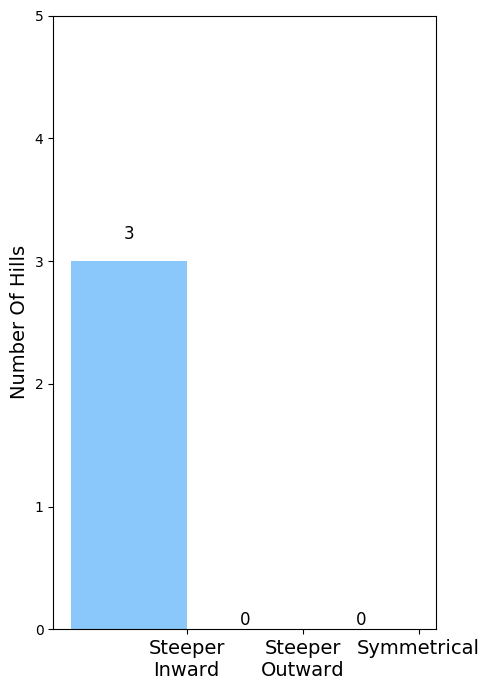

In [12]:
### calculating inwards, outwards & symmetricalls:
inward=outward=equale=0 # counters


### east"
for i in range(len(minmax_i)):
    if minmax_i[i]>minmax_o[i]:
        if minmax_i[i]-1.96*err_minmax_i[i] <= minmax_o[i]+1.96*err_minmax_o[i]:
            equale+=1
        else: 
            inward+=1
    elif minmax_o[i]>minmax_i[i]:
        if minmax_o[i]-1.96*err_minmax_o[i] < minmax_i[i]+1.96*err_minmax_i[i]:
            equale+=1
        else: 
            outward+=1
    else:
        equale+=1

inward = float(inward)
outward = float(outward)
equale= float(equale)

print "\nInward percentage = {:.1f}".format(inward/(inward+outward)*100)
print "None-symmetrical percentage = {:.1f}".format((inward+outward)/(inward+outward+equale)*100)

### writing to output array:
out_ar_slp[8]=inward
out_ar_slp[9]=outward
out_ar_slp[10]=equale
out_ar_slp[11]=inward/(inward+outward)*100
out_ar_slp[12]=(inward+outward)/(inward+outward+equale)*100

######## plotting ##########
n_groups = 1
fig, ax = plt.subplots()
fig.set_size_inches(5,7)
index = np.arange(n_groups)
bar_width = 0.2

#  #ff5555 - red
#  #37c959 - green
opacity = 0.7
rects1 = plt.bar(index, inward, bar_width, alpha=opacity,color='#58b1fa',label='Steeper Inward')
rects2 = plt.bar(index + bar_width, outward, bar_width,alpha=opacity,color='#ff7111',label='Steeper Outward')
rects3 = plt.bar(index + bar_width*2, equale, bar_width,alpha=opacity,color='gray',label='Symmetrical')
plt.ylabel('Number Of Hills',size=14)
plt.xticks((index+bar_width/2.,index + bar_width*1.5,index + bar_width*2.5), 
           ('Steeper\nInward','Steeper\nOutward',"Symmetrical"),size=14)
plt.ylim(0,max(inward,outward,equale)+2)


autolabel(plt,rects1)
autolabel(plt,rects2)
autolabel(plt,rects3)


plt.tight_layout()
plt.show()

___
# Area

In [13]:
area_i=avg_fl[:,area_col_i]
area_o=avg_fl[:,area_col_o]
area_t=area_i+area_o


err_area_i=std_fl[:,area_col_i]/(std_fl[:,15]**0.5)
err_area_o=std_fl[:,area_col_o]/(std_fl[:,15]**0.5)
area_err_t=(std_fl[:,12]+std_fl[:,13])/(std_fl[:,15]**0.5)

TOOLS="hover,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset,save"
### Hills plot
p = bk.figure(plot_width=900,plot_height=400,tools=TOOLS)
p.title.text = "Area of hills"
p.title.align = "center"
p.title.text_font_size = "15px"
p.xaxis.axis_label = x_ax_lbl
p.yaxis.axis_label = 'Area [km^2]'
l_alpha=1
hill_color="Grey"
hill_l_color="Black"
p.segment(x, area_t-area_err_t, x, area_t+area_err_t,line_color=hill_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, area_t+area_err_t, 0.01, 0.01,line_color=hill_l_color,line_alpha=l_alpha)
p.rect(x, area_t-area_err_t, 0.01, 0.01,line_color=hill_l_color,line_alpha=l_alpha)
p.scatter(x,area_t, size=7,marker="square",fill_color=hill_color,line_color=hill_l_color)
bk.show(p)

### Flanks plot
p = bk.figure(plot_width=900,plot_height=400,tools=TOOLS)
p.title.text = "Area of flanks"
p.title.align = "center"
p.title.text_font_size = "15px"
p.xaxis.axis_label = x_ax_lbl
p.yaxis.axis_label = 'Area [km^2]'

in_color="CornflowerBlue"
in_l_color="Navy"
p.segment(x, area_i-err_area_i, x, area_i+err_area_i,line_color=in_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, area_i+err_area_i, 0.02, 0.0001,line_color=in_l_color,line_alpha=l_alpha)
p.rect(x, area_i-err_area_i, 0.02, 0.0001,line_color=in_l_color,line_alpha=l_alpha)
p.scatter(x,area_i, size=7,marker="square",fill_color=in_color,line_color=in_l_color,legend="Inward")

out_color="LightCoral"
out_l_color="DarkRed"
p.segment(x, area_o-err_area_o, x, area_o+err_area_o,line_color=out_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, area_o+err_area_o, 0.02, 0.0001,line_color=out_l_color,line_alpha=l_alpha)
p.rect(x, area_o-err_area_o, 0.02, 0.0001,line_color=out_l_color,line_alpha=l_alpha)
p.scatter(x,area_o, size=7,marker="square",fill_color=out_color,line_color=out_l_color,legend="Outward")

bk.show(p)

### Averages for track

In [14]:
area_t_avg=np.average(area_t)
area_t_avg_stder=(sum((std_fl[:,15]-1)*(std_fl[:,12]+std_fl[:,13])**2)
                  /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)
area_i_avg=np.average(area_i)
area_i_avg_err=(sum((std_fl[:,15]-1)*std_fl[:,area_col_i]**2)
           /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)
area_o_avg=np.average(area_o)
area_o_avg_err=(sum((std_fl[:,15]-1)*std_fl[:,area_col_o]**2)
           /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)

print "average Total area = {:.4f}".format(area_t_avg)
print "average Total area stder = {:.4f}".format(area_t_avg_stder)
print "average IN area = {:.4f}".format(area_i_avg)
print "average IN area stder = {:.4f}".format(area_i_avg_err)
print "average OUT area = {:.4f}".format(area_o_avg)
print "average OUT area stder = {:.4f}".format(area_o_avg_err)

out_ar_area[2]=area_t_avg
out_ar_area[3]=area_t_avg_stder
out_ar_area[4]=area_i_avg
out_ar_area[5]=area_i_avg_err
out_ar_area[6]=area_o_avg
out_ar_area[7]=area_o_avg_err

average Total area = 0.9049
average Total area stder = 0.2854
average IN area = 0.4916
average IN area stder = 0.1304
average OUT area = 0.4133
average OUT area stder = 0.1591


___
## Width

In [15]:
wdt_i=avg_fl[:,wdt_col_i]
wdt_o=avg_fl[:,wdt_col_o]
wdt_t=wdt_i+wdt_o

wdt_err_i=std_fl[:,wdt_col_i]/(std_fl[:,15]**0.5)
wdt_err_o=avg_fl[:,wdt_col_o]/(std_fl[:,15]**0.5)
wdt_err_t=(std_fl[:,4]+std_fl[:,5])/(std_fl[:,15]**0.5)

TOOLS="hover,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset,save"
### Hills plot
p = bk.figure(plot_width=900,plot_height=400,tools=TOOLS)
p.title.text = "Width of hills"
p.title.align = "center"
p.title.text_font_size = "15px"
p.xaxis.axis_label = x_ax_lbl
p.yaxis.axis_label = 'Width [m]'
l_alpha=1
hill_color="Grey"
hill_l_color="Black"
p.segment(x, wdt_t-wdt_err_t, x, wdt_t+wdt_err_t,line_color=hill_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, wdt_t+wdt_err_t, 0.01, 0.01,line_color=hill_l_color,line_alpha=l_alpha)
p.rect(x, wdt_t-wdt_err_t, 0.01, 0.01,line_color=hill_l_color,line_alpha=l_alpha)
p.scatter(x,wdt_t, size=7,marker="square",fill_color=hill_color,line_color=hill_l_color)
bk.show(p)

### Flanks plot
p = bk.figure(plot_width=900,plot_height=400,tools=TOOLS)
p.title.text = "Width of flanks"
p.title.align = "center"
p.title.text_font_size = "15px"
p.xaxis.axis_label = x_ax_lbl
p.yaxis.axis_label = 'Width [m]'

in_color="CornflowerBlue"
in_l_color="Navy"
p.segment(x, wdt_i-wdt_err_i, x, wdt_i+wdt_err_i,line_color=in_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, wdt_i+wdt_err_i, 0.02, 0.01,line_color=in_l_color,line_alpha=l_alpha)
p.rect(x, wdt_i-wdt_err_i, 0.02, 0.01,line_color=in_l_color,line_alpha=l_alpha)
p.scatter(x,wdt_i, size=7,marker="square",fill_color=in_color,line_color=in_l_color,legend="Inward")

out_color="LightCoral"
out_l_color="DarkRed"
p.segment(x, wdt_o-wdt_err_o, x, wdt_o+wdt_err_o,line_color=out_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, wdt_o+wdt_err_o, 0.02, 0.01,line_color=out_l_color,line_alpha=l_alpha)
p.rect(x, wdt_o-wdt_err_o, 0.02, 0.01,line_color=out_l_color,line_alpha=l_alpha)
p.scatter(x,wdt_o, size=7,marker="square",fill_color=out_color,line_color=out_l_color,legend="Outward")

bk.show(p)

### Averages for track

In [16]:
##### flow line averages:
wdt_t_avg=np.average(wdt_t)
wdt_t_avg_stder=(sum((std_fl[:,15]-1)*(std_fl[:,4]+std_fl[:,5])**2)
                 /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)
wdt_i_avg=np.average(wdt_i)
wdt_i_stder=(sum((std_fl[:,15]-1)*std_fl[:,wdt_col_i]**2)
           /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)
wdt_o_avg=np.average(wdt_o)
wdt_o_stder=(sum((std_fl[:,15]-1)*std_fl[:,wdt_col_o]**2)
           /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)

print "average total width = {:.0f}".format(wdt_t_avg)
print "average total width stder = {:.0f}".format(wdt_t_avg_stder)
print "average IN width = {:.0f}".format(wdt_i_avg)
print "average IN width stder = {:.0f}".format(wdt_i_stder)
print "average OUT width = {:.0f}".format(wdt_o_avg)
print "average OUT width stder = {:.0f}".format(wdt_o_stder)

out_ar_wdt[2]=wdt_t_avg
out_ar_wdt[3]=wdt_t_avg_stder
out_ar_wdt[4]=wdt_i_avg
out_ar_wdt[5]=wdt_i_stder
out_ar_wdt[6]=wdt_o_avg
out_ar_wdt[7]=wdt_o_stder

average total width = 3575
average total width stder = 654
average IN width = 1643
average IN width stder = 319
average OUT width = 1932
average OUT width stder = 336


___
## Height

In [17]:
hgt_i=avg_fl[:,hgt_col_i]
hgt_o=avg_fl[:,hgt_col_o]
hgt_t=(hgt_i+hgt_o)/2

hgt_err_i=std_fl[:,hgt_col_i]/(std_fl[:,15]**0.5)
hgt_err_o=std_fl[:,hgt_col_o]/(std_fl[:,15]**0.5)
hgt_err_t=(std_fl[:,6]+std_fl[:,7])/(std_fl[:,15]**0.5)

TOOLS="hover,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset,save"
### Hills plot
p = bk.figure(plot_width=900,plot_height=400,tools=TOOLS)
p.title.text = "Height of hills"
p.title.align = "center"
p.title.text_font_size = "15px"
p.xaxis.axis_label = x_ax_lbl
p.yaxis.axis_label = 'Height [m]'
l_alpha=1
hill_color="Grey"
hill_l_color="Black"
p.segment(x, hgt_t-hgt_err_t, x, hgt_t+hgt_err_t,line_color=hill_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, hgt_t+hgt_err_t, 0.01, 0.01,line_color=hill_l_color,line_alpha=l_alpha)
p.rect(x, hgt_t-hgt_err_t, 0.01, 0.01,line_color=hill_l_color,line_alpha=l_alpha)
p.scatter(x,hgt_t, size=7,marker="square",fill_color=hill_color,line_color=hill_l_color)
bk.show(p)

### Flanks plot
p = bk.figure(plot_width=900,plot_height=400,tools=TOOLS)
p.title.text = "Height of flanks"
p.title.align = "center"
p.title.text_font_size = "15px"
p.xaxis.axis_label = x_ax_lbl
p.yaxis.axis_label = 'Height [m]'

in_color="CornflowerBlue"
in_l_color="Navy"
p.segment(x, hgt_i-hgt_err_i, x, hgt_i+hgt_err_i,line_color=in_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, hgt_i+hgt_err_i, 0.02, 0.01,line_color=in_l_color,line_alpha=l_alpha)
p.rect(x, hgt_i-hgt_err_i, 0.02, 0.01,line_color=in_l_color,line_alpha=l_alpha)
p.scatter(x,hgt_i, size=7,marker="square",fill_color=in_color,line_color=in_l_color,legend="Inward")

out_color="LightCoral"
out_l_color="DarkRed"
p.segment(x, hgt_o-hgt_err_o, x, hgt_o+hgt_err_o,line_color=out_l_color,line_width=1,line_alpha=l_alpha)
p.rect(x, hgt_o+hgt_err_o, 0.02, 0.01,line_color=out_l_color,line_alpha=l_alpha)
p.rect(x, hgt_o-hgt_err_o, 0.02, 0.01,line_color=out_l_color,line_alpha=l_alpha)
p.scatter(x,hgt_o, size=7,marker="square",fill_color=out_color,line_color=out_l_color,legend="Outward")

bk.show(p)

### Averages for track

In [18]:
hgt_avg=np.average(hgt_t)
hgt_avg_stder=(sum((std_fl[:,15]-1)*(std_fl[:,6]+std_fl[:,7])**2)
               /(sum(std_fl[:,15])-len(std_fl)))**0.5/2/(len(x)**0.5)
hgt_i_avg=np.average(hgt_i)
hgt_i_stder=(sum((std_fl[:,15]-1)*std_fl[:,hgt_col_i]**2)
           /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)
hgt_o_avg=np.average(hgt_o)
hgt_o_stder=(sum((std_fl[:,15]-1)*std_fl[:,hgt_col_o]**2)
           /(sum(std_fl[:,15])-len(std_fl)))**0.5/(len(x)**0.5)

##### flow line averages:
print "average height = {:.0f}".format(hgt_avg)
print "average height stder = {:.0f}".format(hgt_avg_stder)
print "average IN height = {:.0f}".format(hgt_i_avg)
print "average IN height stder = {:.0f}".format(hgt_i_stder)
print "average OUT height = {:.0f}".format(hgt_o_avg)
print "average OUT height stder = {:.0f}".format(hgt_o_stder)

out_ar_hgt[2]=hgt_avg
out_ar_hgt[3]=hgt_avg_stder
out_ar_hgt[4]=hgt_i_avg
out_ar_hgt[5]=hgt_i_stder
out_ar_hgt[6]=hgt_o_avg
out_ar_hgt[7]=hgt_o_stder

average height = 492
average height stder = 89
average IN height = 573
average IN height stder = 88
average OUT height = 412
average OUT height stder = 91


## Writing track-averages to csv file

In [19]:
out_ar_all=np.vstack((out_ar_slp.reshape(1,len(out_ar_slp)),out_ar_area.reshape(1,len(out_ar_area)),
                      out_ar_wdt.reshape(1,len(out_ar_wdt)),out_ar_hgt.reshape(1,len(out_ar_hgt)))) 
np.savetxt("results_temp.csv",out_ar_all,delimiter=",",
           header="line 3=slope; line 4=area; line 5=width; line 6=height \n no. of hills,median no. of cross section, hill avg, hill avg SE, in flank avg, in flank SE, out flank, out flank SE, no. of inward facing hills, no. of outward facing hills, no. of symetrical hills, percent of inward facing hills, percent of asymmetrical hills")
print "done"

done


## Writing shape data for each hill to a text file

#### Array of distances of hills from the mid-ocean ridge (mor)

In [20]:
dist2mor=[]
mor_xy=[-43.83,28.24] # lon,lat
for i in range(len(avg_fl)):
    dist2mor.append(lonlatdist(mor_xy,avg_fl[i,1:3]))
dist2mor=np.array(dist2mor)

#### Writing to file

In [21]:
s_rate=23. #full spreading rate
out_f_flowline=f_name[:f_name.find("_hill")]+"_shapes_flowline.txt"
flowline_ar=np.hstack((dist2mor.reshape(len(hgt_t),1),dist2mor.reshape(len(hgt_t),1)/(s_rate/2.),
                       minmax_t.reshape(len(hgt_t),1),minmax_t_err.reshape(len(hgt_t),1),
                       hgt_t.reshape(len(hgt_t),1),hgt_err_t.reshape(len(hgt_t),1),
                       wdt_t.reshape(len(hgt_t),1),wdt_err_t.reshape(len(hgt_t),1),
                       area_t.reshape(len(hgt_t),1),area_err_t.reshape(len(hgt_t),1)))
np.savetxt(out_f_flowline,flowline_ar,fmt="%.4f",
           header=
           "distance age slope slope-SE height height-SE width width-SE area area-SE")